In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 

#### Preapering Dataset 

In [2]:
dic_data = {'Heights':[63, 64, 66, 69, 70, 72, 74], 'Weights': [127, 131, 142, 160, 160, 171, 175] }

In [3]:
data_set = pd.DataFrame(dic_data)

In [4]:
data_set

,Heights,Weights
0,63,127
1,64,131
2,66,142
3,69,160
4,70,160
5,72,171
6,74,175


Text(0.5, 1.0, 'Scatter plot of data')

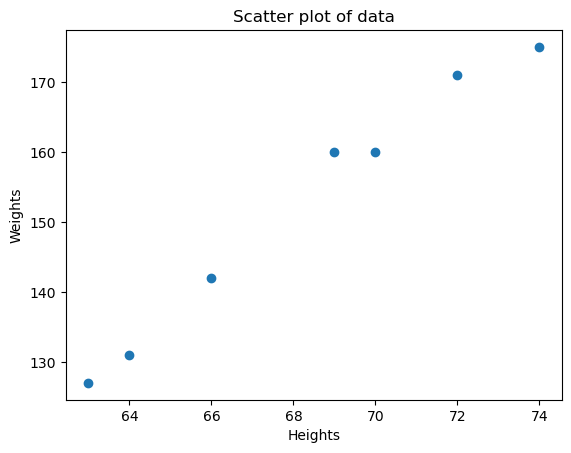

In [5]:
plt.scatter(data_set['Heights'], data_set['Weights'])
plt.xlabel('Heights')
plt.ylabel('Weights')
plt.title('Scatter plot of data')

In [6]:
x = np.array(data_set['Heights']).reshape(7,1) # the values of heights I converted to np array as x
y = np.array(data_set['Weights']).reshape(7,1) # the values of Weights I converted to np array as y

print('The values of heights: ', x, 'The value of Weights: ', y)

The values of heights:  [[63]
 [64]
 [66]
 [69]
 [70]
 [72]
 [74]] The value of Weights:  [[127]
 [131]
 [142]
 [160]
 [160]
 [171]
 [175]]


Now we can start to implement Linear Regression

The Cost function is defined as $ cost = \frac{1}{2n}\sum_{i=1}^{n}(y^{(i)}-\hat{y}^{(i)})^2 $ where $\hat{y} = ax+b $

In [7]:
def cost(y,y_):
    loss = (y - y_)**2
    cost = np.sum(loss)
    return cost
    

To find gradient of $$ cost = \frac{1}{n}\sum_{i=1}^{n}(y^{(i)}-ax^{(i)}-b)^2 $$ we should take partial derivatives of cost function, we will use chain  rule for derivatives to find derivatives with respect to x and b.
$$ \frac{\partial cost}{\partial a}= \frac{1}{n}\sum_{i=1}^{n}(y^{(i)} - ax^{i} -b)x^{i} $$
$$ \frac{\partial cost}{\partial b}= \frac{1}{n}\sum_{i=1}^{n}(y^{(i)} - ax^{i} -b) $$

example:

derivative of $y = (ax +b)^2 $ with respect to a is $ h' = 2(ax+b)x$



 

In [8]:
y.shape[0]

7

In [87]:

def linear_model(x, y, n_iter, l_r):
    
    n = y.shape[0]
    a=3
    b=-70
    error_history = []
    for i in range(n_iter+1):
        
        y_ = a*x + b # y_  predicted value
        dcost_da = (1/n)* np.dot(x.T,y_ - y)
        dcost_db = (1/n)*np.sum(y_ - y)
        
        
        a = a - l_r*dcost_da
        b = b - l_r*dcost_db
        
        error_history.append(cost(y,y_))
        
    plt.plot(error_history)
    plt.title('Learning Curve')
    plt.xlabel('num of  iter')
    plt.ylabel('value of errors')
    
    y_ = a*x + b # y predicted value
    
    
    df = pd.DataFrame({'true_values': y.flatten(), 'predicted values': y_.flatten()})
    print(df)
    
    return a, b
        



In [88]:
n_iter = 800000
l_r = 0.0004


   true_values  predicted values
0          127        130.711827
1          131        134.813325
2          142        143.016320
3          160        155.320813
4          160        159.422311
5          171        167.625306
6          175        175.828301


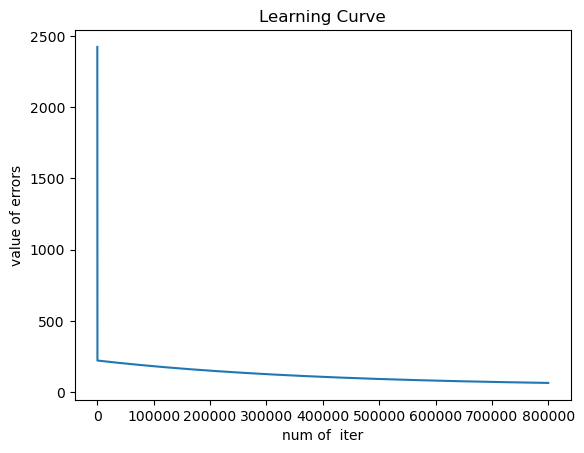

In [89]:
a, b=  linear_model(x, y, n_iter, l_r)
line_fits_data = a*x + b

In [90]:
print(a, b)

[[4.10149761]] -127.68252197136074


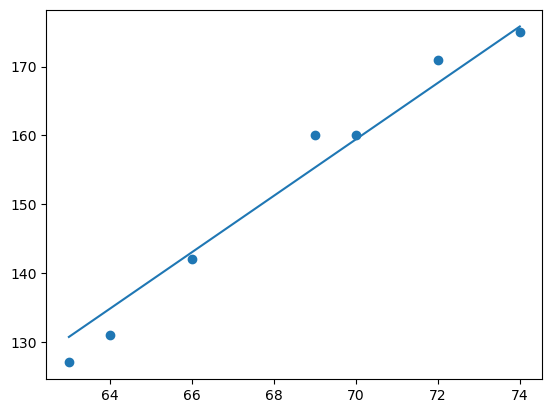

In [91]:
line_fits_data = a*x + b
plt.plot(x, line_fits_data)
plt.plot()
plt.scatter(x, y)

### Using Numpy Lib

In [92]:
a_np, b_np = np.polyfit(x.flatten(), y.flatten(), 1)
print(a_np, b_np)

4.598591549295762 -161.73239436619633


In [93]:
test = a_np*x + b_np

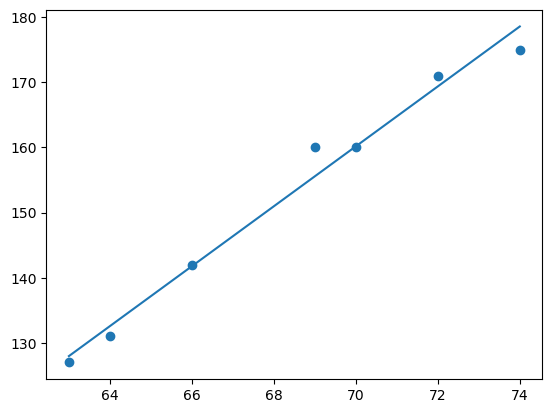

In [94]:
plt.scatter(x, y)
plt.plot(x, test)
